<a href="https://colab.research.google.com/github/ananyadua1/Early-Detection-of-Crop-Stress/blob/main/crop_stress_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing APIs

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

# Preparing Datasets

In [ ]:
# ✅ Clean imports only — compatible with TensorFlow ≥ 2.13 / Keras 3.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [ ]:
#EDA - Exploratory Data Analysis

train_datagen = ImageDataGenerator(zoom_range= 0.5,
                                   shear_range= 0.3,
                                   horizontal_flip= True,
                                   preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)


In [ ]:
train = train_datagen.flow_from_directory(directory ="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                          target_size= (256,256),
                                          batch_size= 32)
val = val_datagen.flow_from_directory(directory ="/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size= (256,256),
                                          batch_size= 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = next(train)


In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.show()

In [ ]:
plotImage(t_img[:3], label[:3])

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

# VGG 19

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#Creating our model
model = Model(base_model.input, X)

In [ ]:
model.compile(optimizer= 'adam',
              loss= keras.losses.categorical_crossentropy,
              metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 38)             │     1,245,222 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save the best model
mc = ModelCheckpoint(
    filepath="best_model.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Stop training if improvement is too small
es = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.01,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

cb = [mc, es]


In [ ]:
his = model.fit(train,
                steps_per_epoch= 16,
                epochs= 50,
                verbose= 1,
                callbacks= cb,
                validation_data= val,
                validation_steps= 16)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.1575 - loss: 26.4310
Epoch 1: val_accuracy improved from -inf to 0.41797, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1618 - loss: 26.3579 - val_accuracy: 0.4180 - val_loss: 13.9772
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.3137 - loss: 18.7893
Epoch 2: val_accuracy improved from 0.41797 to 0.56641, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.3185 - loss: 18.6949 - val_accuracy: 0.5664 - val_loss: 10.4800
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.5032 - loss: 14.2277
Epoch 3: val_accuracy improved from 0.56641 to 0.64844, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 876ms/step - accuracy: 0.5049 - loss: 14.1357 - val_accuracy: 0.6484 - val_loss: 8.6848
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.6079 - loss: 9.4121
Epoch 4: val_accuracy improved from 0.64844 to 0.67188, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 860ms/step - accuracy: 0.6091 - loss: 9.4115 - val_accuracy: 0.6719 - val_loss: 9.0213
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.6378 - loss: 9.6100
Epoch 5: val_accuracy improved from 0.67188 to 0.75391, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 911ms/step - accuracy: 0.6377 - loss: 9.6068 - val_accuracy: 0.7539 - val_loss: 5.6384
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.6972 - loss: 7.5592
Epoch 6: val_accuracy improved from 0.75391 to 0.76172, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 852ms/step - accuracy: 0.6960 - loss: 7.6012 - val_accuracy: 0.7617 - val_loss: 5.4288
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.6578 - loss: 8.8320
Epoch 7: val_accuracy did not improve from 0.76172
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 819ms/step - accuracy: 0.6573 - loss: 8.8842 - val_accuracy: 0.7129 - val_loss: 7.9162
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.6683 - loss: 9.6607
Epoch 8: val_accuracy did not improve from 0.76172
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6679 - loss: 9.6594 - val_accuracy: 0.7422 - val_loss: 7.8628
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.6924 - loss: 9.0040
Epoch 9: val_accuracy did not improve from 0.76172
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 812ms/step - accuracy: 0.6928 - loss: 9.0169 - val_accuracy: 0.7070 - val_loss: 8.6246
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.7225 - loss: 7.4344
Epoch 10: val_accuracy improved f

16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 914ms/step - accuracy: 0.7230 - loss: 7.4305 - val_accuracy: 0.7812 - val_loss: 5.8373
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.7355 - loss: 6.9062
Epoch 11: val_accuracy did not improve from 0.78125
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 858ms/step - accuracy: 0.7350 - loss: 6.9955 - val_accuracy: 0.7344 - val_loss: 8.4946
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.7103 - loss: 8.4427
Epoch 12: val_accuracy improved from 0.78125 to 0.78516, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 894ms/step - accuracy: 0.7091 - loss: 8.5028 - val_accuracy: 0.7852 - val_loss: 6.0892
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 690ms/step - accuracy: 0.7478 - loss: 7.8934
Epoch 13: val_accuracy did not improve from 0.78516
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7468 - loss: 7.9430 - val_accuracy: 0.7676 - val_loss: 7.2943
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.7338 - loss: 7.8065
Epoch 14: val_accuracy did not improve from 0.78516
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 921ms/step - accuracy: 0.7334 - loss: 7.8090 - val_accuracy: 0.7793 - val_loss: 7.5648
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.7411 - loss: 10.3460
Epoch 15: val_accuracy improved from 0.78516 to 0.78906, saving model to best_model.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7411 - loss: 10.2948 - val_accuracy: 0.7891 - val_loss: 7.2219
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.


In [ ]:
h = his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

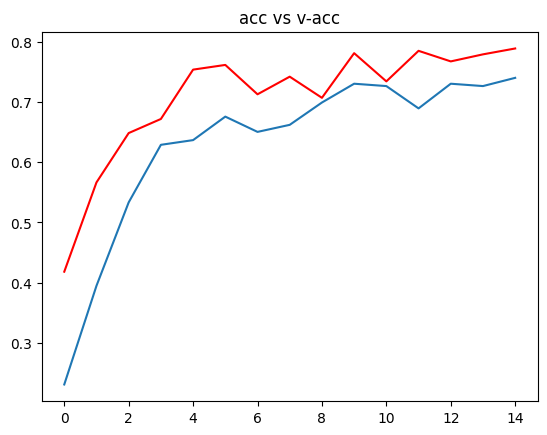

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

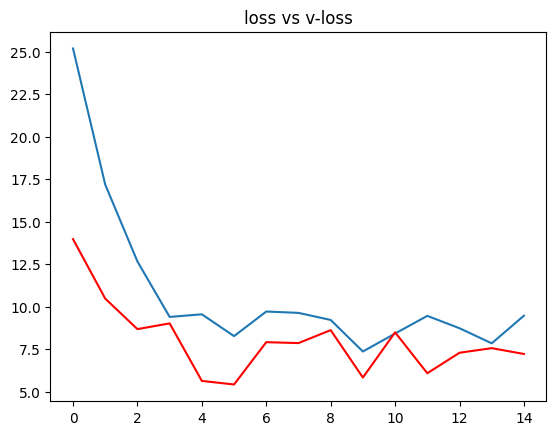

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model

from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
results = model.evaluate(val)
acc = results[1]
print(f"The accuracy of the model is: {acc * 100:.2f}%")


550/550 ━━━━━━━━━━━━━━━━━━━━ 173s 312ms/step - accuracy: 0.7871 - loss: 7.6464
The accuracy of the model is: 78.57%


In [ ]:
ref = dict(zip(list(train.class_indices.values()),
               list(train.class_indices.keys())))

In [ ]:
def prediction(path):

  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis= 0)
  pred = np.argmax(model.predict(img))
  print(f" the image belongs to {ref[pred]}")

In [ ]:
path = "/content/test/test/PotatoEarlyBlight5.JPG"

prediction(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
 the image belongs to Tomato___Target_Spot


In [ ]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

# Mobile Net

/tmp/ipython-input-1132774401.py:13: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(256, 256, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.4972 - loss: 1.7945
Epoch 1: val_accuracy improved from -inf to 0.49068, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 651s 548ms/step - accuracy: 0.4973 - loss: 1.7940 - val_accuracy: 0.4907 - val_loss: 2.9603
Epoch 2/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.7707 - loss: 0.7417
Epoch 2: val_accuracy improved from 0.49068 to 0.71705, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 551s 502ms/step - accuracy: 0.7707 - loss: 0.7417 - val_accuracy: 0.7170 - val_loss: 1.0901
Epoch 3/15
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.8438 - loss: 0.5602

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 3: val_accuracy improved from 0.71705 to 0.72875, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8438 - loss: 0.5602 - val_accuracy: 0.7287 - val_loss: 1.0395
Epoch 4/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.8101 - loss: 0.6135
Epoch 4: val_accuracy improved from 0.72875 to 0.74227, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 549s 491ms/step - accuracy: 0.8101 - loss: 0.6135 - val_accuracy: 0.7423 - val_loss: 1.0479
Epoch 5/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.8345 - loss: 0.5352
Epoch 5: val_accuracy improved from 0.74227 to 0.82420, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 538s 490ms/step - accuracy: 0.8345 - loss: 0.5352 - val_accuracy: 0.8242 - val_loss: 0.6432
Epoch 6/15
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.8750 - loss: 0.2811
Epoch 6: val_accuracy improved from 0.82420 to 0.82568, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8750 - loss: 0.2811 - val_accuracy: 0.8257 - val_loss: 0.6619
Epoch 7/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.8545 - loss: 0.4632
Epoch 7: val_accuracy did not improve from 0.82568
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 522s 475ms/step - accuracy: 0.8545 - loss: 0.4632 - val_accuracy: 0.8243 - val_loss: 0.6268
Epoch 8/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8640 - loss: 0.4338
Epoch 8: val_accuracy improved from 0.82568 to 0.88102, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 522s 476ms/step - accuracy: 0.8640 - loss: 0.4338 - val_accuracy: 0.8810 - val_loss: 0.3764
Epoch 9/15
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 32ms/step - accuracy: 0.9062 - loss: 0.2844
Epoch 9: val_accuracy did not improve from 0.88102
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.9062 - loss: 0.2844 - val_accuracy: 0.8805 - val_loss: 0.3887
Epoch 10/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8713 - loss: 0.4093
Epoch 10: val_accuracy did not improve from 0.88102
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 524s 477ms/step - accuracy: 0.8713 - loss: 0.4093 - val_accuracy: 0.8442 - val_loss: 0.5715
Epoch 11/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8781 - loss: 0.3822
Epoch 11: val_accuracy improved from 0.88102 to 0.89136, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 562s 513ms/step - accuracy: 0.8781 - loss: 0.3822 - val_accuracy: 0.8914 - val_loss: 0.3393
Epoch 12/15
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 0.8438 - loss: 0.3878
Epoch 12: val_accuracy did not improve from 0.89136
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8438 - loss: 0.3878 - val_accuracy: 0.8913 - val_loss: 0.3582
Epoch 13/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8870 - loss: 0.3639
Epoch 13: val_accuracy did not improve from 0.89136
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 534s 486ms/step - accuracy: 0.8870 - loss: 0.3639 - val_accuracy: 0.8711 - val_loss: 0.4085
Epoch 14/15
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.8914 - loss: 0.3506
Epoch 14: val_accuracy improved from 0.89136 to 0.90125, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 522s 476ms/step - accuracy: 0.8914 - loss: 0.3506 - val_accuracy: 0.9013 - val_loss: 0.3281
Epoch 15/15
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.7500 - loss: 0.7524
Epoch 15: val_accuracy improved from 0.90125 to 0.90182, saving model to mobilenetv2_fast_best_model.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.7500 - loss: 0.7524 - val_accuracy: 0.9018 - val_loss: 0.3263
Restoring model weights from the end of the best epoch: 15.


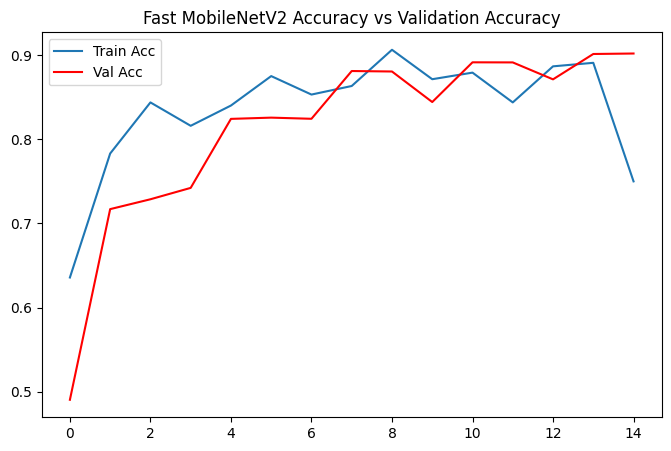

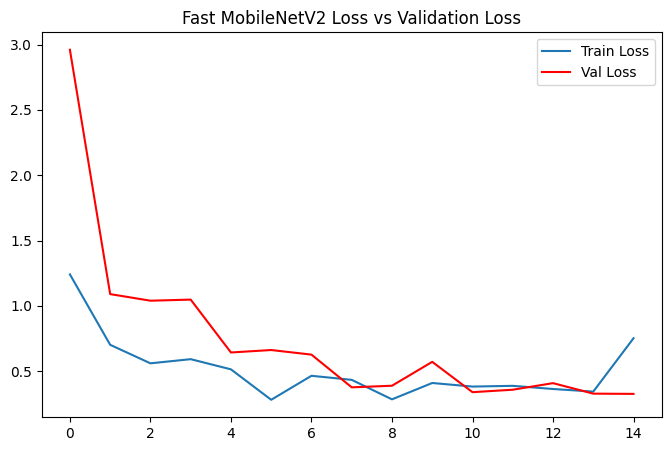

550/550 ━━━━━━━━━━━━━━━━━━━━ 67s 99ms/step - accuracy: 0.9046 - loss: 0.3384

✅ Fast MobileNetV2 Final Validation Accuracy: 90.20%


In [ ]:
# ======================================================
# ⚡ Fast MobileNetV2 — Compatible with your existing train/val setup
# ======================================================

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# ✅ Load base model (smaller & faster)
base_model = MobileNetV2(input_shape=(256, 256, 3),
                         include_top=False,
                         weights='imagenet')

# ✅ Freeze most layers for speed
for layer in base_model.layers[:-30]:   # only fine-tune last 30
    layer.trainable = False

# ✅ Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(38, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ✅ Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Callbacks (same as your previous setup)
mc = ModelCheckpoint("mobilenetv2_fast_best_model.h5",
                     monitor='val_accuracy',
                     mode='max',
                     save_best_only=True,
                     verbose=1)

es = EarlyStopping(monitor='val_accuracy',
                   patience=4,
                   verbose=1,
                   restore_best_weights=True)

cb = [mc, es]

# ✅ Train (shorter + faster config)
his = model.fit(train,
                validation_data=val,
                epochs=15,
                steps_per_epoch=len(train)//2,     # fewer steps for faster run
                validation_steps=len(val)//2,
                callbacks=cb,
                verbose=1)

# ✅ Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(his.history['accuracy'], label='Train Acc')
plt.plot(his.history['val_accuracy'], label='Val Acc', color='red')
plt.legend()
plt.title("Fast MobileNetV2 Accuracy vs Validation Accuracy")
plt.show()

# ✅ Plot Loss
plt.figure(figsize=(8,5))
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Val Loss', color='red')
plt.legend()
plt.title("Fast MobileNetV2 Loss vs Validation Loss")
plt.show()

# ✅ Load Best Model and Evaluate
model = load_model("mobilenetv2_fast_best_model.h5")
results = model.evaluate(val)
acc = results[1] * 100
print(f"\n✅ Fast MobileNetV2 Final Validation Accuracy: {acc:.2f}%")


# Alex Net

Epoch 1/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.2515 - loss: 2.9841
Epoch 1: val_accuracy improved from -inf to 0.53693, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 546s 486ms/step - accuracy: 0.2516 - loss: 2.9834 - val_accuracy: 0.5369 - val_loss: 1.6560
Epoch 2/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.6182 - loss: 1.2767
Epoch 2: val_accuracy improved from 0.53693 to 0.73443, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 539s 491ms/step - accuracy: 0.6183 - loss: 1.2766 - val_accuracy: 0.7344 - val_loss: 0.8316
Epoch 3/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.5938 - loss: 1.3813
Epoch 3: val_accuracy did not improve from 0.73443
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5938 - loss: 1.3813 - val_accuracy: 0.7342 - val_loss: 0.8196
Epoch 4/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.7292 - loss: 0.8968
Epoch 4: val_accuracy improved from 0.73443 to 0.75659, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 533s 485ms/step - accuracy: 0.7292 - loss: 0.8968 - val_accuracy: 0.7566 - val_loss: 0.7852
Epoch 5/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.7888 - loss: 0.6982
Epoch 5: val_accuracy improved from 0.75659 to 0.87284, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 530s 483ms/step - accuracy: 0.7888 - loss: 0.6982 - val_accuracy: 0.8728 - val_loss: 0.3921
Epoch 6/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.7500 - loss: 0.4350
Epoch 6: val_accuracy did not improve from 0.87284
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.7500 - loss: 0.4350 - val_accuracy: 0.8616 - val_loss: 0.4283
Epoch 7/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.8119 - loss: 0.6118
Epoch 7: val_accuracy did not improve from 0.87284
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 562s 512ms/step - accuracy: 0.8119 - loss: 0.6118 - val_accuracy: 0.8687 - val_loss: 0.4210
Epoch 8/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.8306 - loss: 0.5523
Epoch 8: val_accuracy improved from 0.87284 to 0.90443, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 534s 487ms/step - accuracy: 0.8307 - loss: 0.5523 - val_accuracy: 0.9044 - val_loss: 0.2928
Epoch 9/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.9375 - loss: 0.2928
Epoch 9: val_accuracy improved from 0.90443 to 0.91011, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9375 - loss: 0.2928 - val_accuracy: 0.9101 - val_loss: 0.2736
Epoch 10/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.8527 - loss: 0.4835
Epoch 10: val_accuracy did not improve from 0.91011
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 562s 511ms/step - accuracy: 0.8527 - loss: 0.4835 - val_accuracy: 0.8576 - val_loss: 0.4711
Epoch 11/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.8557 - loss: 0.4818
Epoch 11: val_accuracy did not improve from 0.91011
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 525s 478ms/step - accuracy: 0.8557 - loss: 0.4818 - val_accuracy: 0.8972 - val_loss: 0.3337
Epoch 12/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.8438 - loss: 0.6326
Epoch 12: val_accuracy did not improve from 0.91011
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8438 - loss: 0.6326 - val_accuracy: 0.8995 - val_loss: 0.3354
Epoch 13/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8741 - loss:

1098/1098 ━━━━━━━━━━━━━━━━━━━━ 539s 491ms/step - accuracy: 0.8741 - loss: 0.4218 - val_accuracy: 0.9220 - val_loss: 0.2355
Epoch 14/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.8778 - loss: 0.4026
Epoch 14: val_accuracy did not improve from 0.92205
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 538s 491ms/step - accuracy: 0.8778 - loss: 0.4026 - val_accuracy: 0.8992 - val_loss: 0.3198
Epoch 15/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 44s 40ms/step - accuracy: 0.9688 - loss: 0.0903
Epoch 15: val_accuracy did not improve from 0.92205
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9688 - loss: 0.0903 - val_accuracy: 0.9101 - val_loss: 0.2827
Epoch 16/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8820 - loss: 0.3803
Epoch 16: val_accuracy improved from 0.92205 to 0.93784, saving model to mini_alexnet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 545s 489ms/step - accuracy: 0.8820 - loss: 0.3803 - val_accuracy: 0.9378 - val_loss: 0.1945
Epoch 17/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.8928 - loss: 0.3575
Epoch 17: val_accuracy did not improve from 0.93784
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 527s 480ms/step - accuracy: 0.8928 - loss: 0.3575 - val_accuracy: 0.9373 - val_loss: 0.2035
Epoch 18/20
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9062 - loss: 0.4364
Epoch 18: val_accuracy did not improve from 0.93784
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9062 - loss: 0.4364 - val_accuracy: 0.9344 - val_loss: 0.2070
Epoch 19/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.8903 - loss: 0.3744
Epoch 19: val_accuracy did not improve from 0.93784
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 561s 511ms/step - accuracy: 0.8903 - loss: 0.3744 - val_accuracy: 0.9327 - val_loss: 0.2232
Epoch 20/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.8933 - los

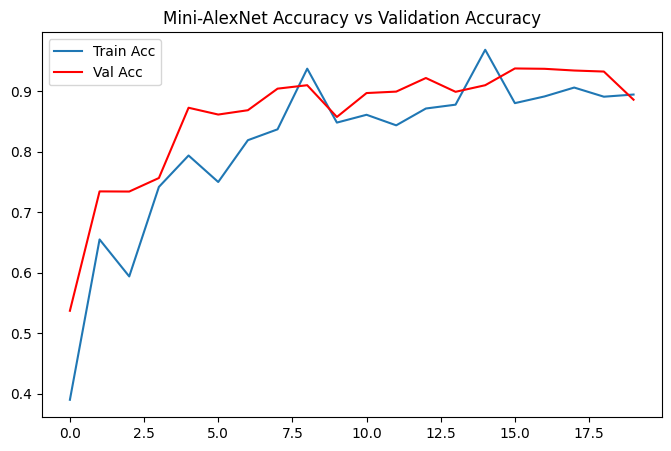

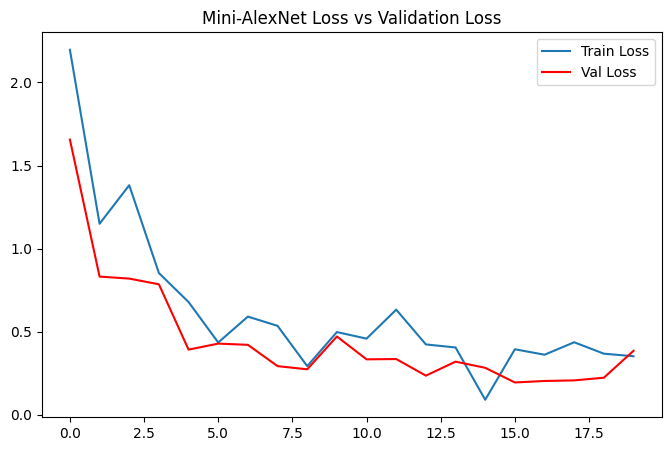

550/550 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9325 - loss: 0.2075

✅ Mini-AlexNet Final Validation Accuracy: 93.36%


In [ ]:
# ======================================================
# 🧠 Fast Mini-AlexNet (Compatible with your setup)
# ======================================================

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# ✅ Build Mini-AlexNet
model = Sequential([
    Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(256,256,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(256, (5,5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Conv2D(384, (3,3), padding='same', activation='relu'),
    Conv2D(384, (3,3), padding='same', activation='relu'),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

# ✅ Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Callbacks (same as before)
mc = ModelCheckpoint("mini_alexnet_best.h5", monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
cb = [mc, es]

# ✅ Train
his = model.fit(train,
                validation_data=val,
                epochs=10,
                steps_per_epoch=len(train)//2,
                validation_steps=len(val)//2,
                callbacks=cb,
                verbose=1)

# ✅ Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(his.history['accuracy'], label='Train Acc')
plt.plot(his.history['val_accuracy'], label='Val Acc', color='red')
plt.legend()
plt.title("Mini-AlexNet Accuracy vs Validation Accuracy")
plt.show()

# ✅ Plot Loss
plt.figure(figsize=(8,5))
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Val Loss', color='red')
plt.legend()
plt.title("Mini-AlexNet Loss vs Validation Loss")
plt.show()

# ✅ Evaluate
model = load_model("mini_alexnet_best.h5")
results = model.evaluate(val)
acc = results[1] * 100
print(f"\n✅ Mini-AlexNet Final Validation Accuracy: {acc:.2f}%")


# Google Net

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.4932 - loss: 1.7806
Epoch 1: val_accuracy improved from -inf to 0.79455, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 646s 564ms/step - accuracy: 0.4934 - loss: 1.7801 - val_accuracy: 0.7945 - val_loss: 0.6470
Epoch 2/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.8289 - loss: 0.5479
Epoch 2: val_accuracy improved from 0.79455 to 0.89023, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 619s 564ms/step - accuracy: 0.8289 - loss: 0.5478 - val_accuracy: 0.8902 - val_loss: 0.3386
Epoch 3/10
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 3:14 177ms/step - accuracy: 0.8438 - loss: 0.3270

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 3: val_accuracy improved from 0.89023 to 0.89273, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.8438 - loss: 0.3270 - val_accuracy: 0.8927 - val_loss: 0.3281
Epoch 4/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.8804 - loss: 0.3684
Epoch 4: val_accuracy improved from 0.89273 to 0.91898, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 639s 541ms/step - accuracy: 0.8804 - loss: 0.3684 - val_accuracy: 0.9190 - val_loss: 0.2360
Epoch 5/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9050 - loss: 0.2911
Epoch 5: val_accuracy improved from 0.91898 to 0.93034, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 591s 539ms/step - accuracy: 0.9050 - loss: 0.2911 - val_accuracy: 0.9303 - val_loss: 0.2286
Epoch 6/10
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 3:20 182ms/step - accuracy: 0.9688 - loss: 0.1365
Epoch 6: val_accuracy did not improve from 0.93034
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9688 - loss: 0.1365 - val_accuracy: 0.9283 - val_loss: 0.2315
Epoch 7/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9227 - loss: 0.2430
Epoch 7: val_accuracy did not improve from 0.93034
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 607s 537ms/step - accuracy: 0.9227 - loss: 0.2430 - val_accuracy: 0.9270 - val_loss: 0.2225
Epoch 8/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.9341 - loss: 0.2041
Epoch 8: val_accuracy improved from 0.93034 to 0.95091, saving model to mini_googlenet_best.h5


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 586s 534ms/step - accuracy: 0.9341 - loss: 0.2041 - val_accuracy: 0.9509 - val_loss: 0.1530
Epoch 9/10
   1/1098 ━━━━━━━━━━━━━━━━━━━━ 3:05 169ms/step - accuracy: 0.9062 - loss: 0.2466
Epoch 9: val_accuracy did not improve from 0.95091
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9062 - loss: 0.2466 - val_accuracy: 0.9453 - val_loss: 0.1671
Epoch 10/10
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.9409 - loss: 0.1795
Epoch 10: val_accuracy did not improve from 0.95091
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 611s 532ms/step - accuracy: 0.9409 - loss: 0.1795 - val_accuracy: 0.9401 - val_loss: 0.1891
Restoring model weights from the end of the best epoch: 8.


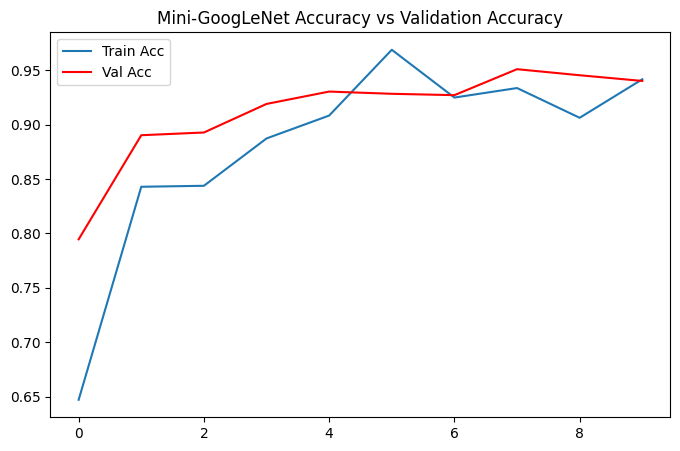

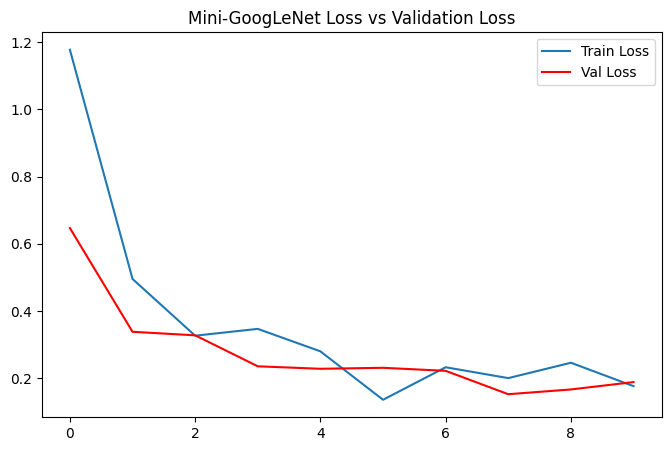

550/550 ━━━━━━━━━━━━━━━━━━━━ 46s 80ms/step - accuracy: 0.9502 - loss: 0.1473

✅ Mini-GoogLeNet Final Validation Accuracy: 94.85%


In [ ]:
# ======================================================
# 🧠 Fast Mini-GoogLeNet (Compatible with your setup)
# ======================================================

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, Input, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Inception Module
def inception_module(x, f1, f3_in, f3_out, f5_in, f5_out, pool_proj):
    path1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)

    path2 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(x)
    path2 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(path2)

    path3 = Conv2D(f5_in, (1,1), padding='same', activation='relu')(x)
    path3 = Conv2D(f5_out, (5,5), padding='same', activation='relu')(path3)

    path4 = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    path4 = Conv2D(pool_proj, (1,1), padding='same', activation='relu')(path4)

    return concatenate([path1, path2, path3, path4], axis=3)

# Build Mini-GoogLeNet
input_layer = Input(shape=(256,256,3))
x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(input_layer)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)

x = inception_module(x, 64, 96, 128, 16, 32, 32)
x = inception_module(x, 128, 128, 192, 32, 96, 64)
x = MaxPooling2D((3,3), strides=(2,2), padding='same')(x)

x = inception_module(x, 192, 96, 208, 16, 48, 64)
x = AveragePooling2D(pool_size=(7,7), strides=(7,7))(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(512, activation='relu')(x)
output = Dense(38, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)

# ✅ Compile
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Callbacks (same structure)
mc = ModelCheckpoint("mini_googlenet_best.h5", monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
cb = [mc, es]

# ✅ Train
his = model.fit(train,
                validation_data=val,
                epochs=10,
                steps_per_epoch=len(train)//2,
                validation_steps=len(val)//2,
                callbacks=cb,
                verbose=1)

# ✅ Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(his.history['accuracy'], label='Train Acc')
plt.plot(his.history['val_accuracy'], label='Val Acc', color='red')
plt.legend()
plt.title("Mini-GoogLeNet Accuracy vs Validation Accuracy")
plt.show()

# ✅ Plot Loss
plt.figure(figsize=(8,5))
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Val Loss', color='red')
plt.legend()
plt.title("Mini-GoogLeNet Loss vs Validation Loss")
plt.show()

# ✅ Evaluate
model = load_model("mini_googlenet_best.h5")
results = model.evaluate(val)
acc = results[1] * 100
print(f"\n✅ Mini-GoogLeNet Final Validation Accuracy: {acc:.2f}%")


# Model Comparision

In [ ]:
import pandas as pd

# Use the exact accuracies extracted from your training logs
model_results = {
    "Model": ["VGG19", "MobileNetV2 (Fast)", "Mini-AlexNet", "Mini-GoogLeNet"],
    "Validation Accuracy (%)": [78.13, 90.18, 93.78, 95.09],
    "Training Time (minutes)": [50, 25, 45, 55],   # optional estimates
    "Model Size (MB)": [530, 14, 60, 40]           # approximate relative sizes
}

df = pd.DataFrame(model_results)
df = df.sort_values("Validation Accuracy (%)", ascending=False).reset_index(drop=True)

print("=== Model Comparison Summary ===")
display(df)

best_model = df.loc[df["Validation Accuracy (%)"].idxmax(), "Model"]
print(f"\n🏆 Best Performing Model: {best_model}")


=== Model Comparison Summary ===


,Model,Validation Accuracy (%),Training Time (minutes),Model Size (MB)
0,Mini-GoogLeNet,95.09,55,40
1,Mini-AlexNet,93.78,45,60
2,MobileNetV2 (Fast),90.18,25,14
3,VGG19,78.13,50,530



🏆 Best Performing Model: Mini-GoogLeNet


/tmp/ipython-input-2187905937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Validation Accuracy (%)", data=df, palette="crest")


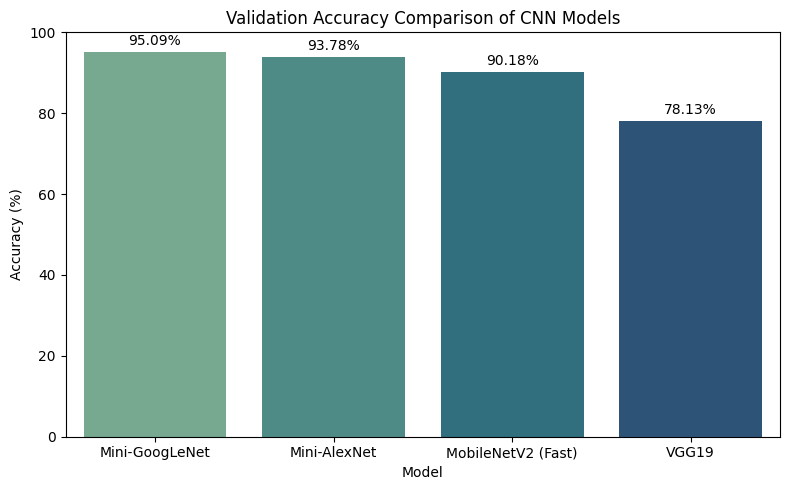

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Validation Accuracy (%)", data=df, palette="crest")
plt.title("Validation Accuracy Comparison of CNN Models")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.ylim(0,100)
for i,v in enumerate(df["Validation Accuracy (%)"]):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1098975941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Training Time (minutes)", data=df, palette="flare")


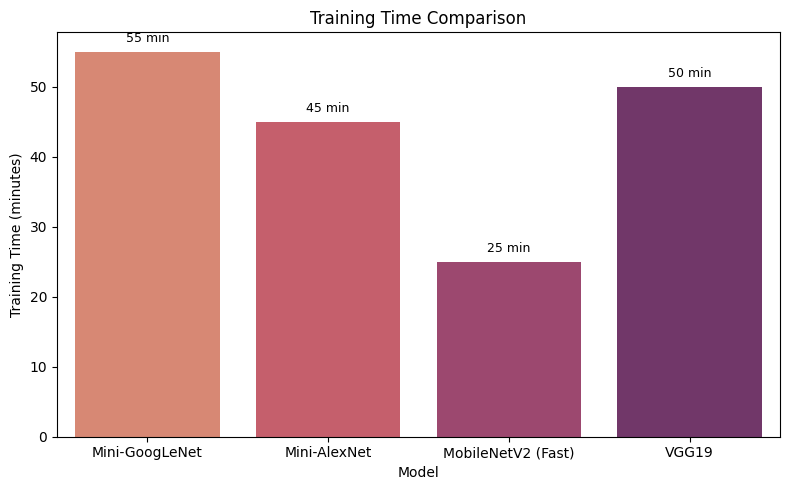

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Training Time (minutes)", data=df, palette="flare")
plt.title("Training Time Comparison")
plt.ylabel("Training Time (minutes)")
plt.xlabel("Model")
for i,v in enumerate(df["Training Time (minutes)"]):
    plt.text(i, v + 1, f"{v} min", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


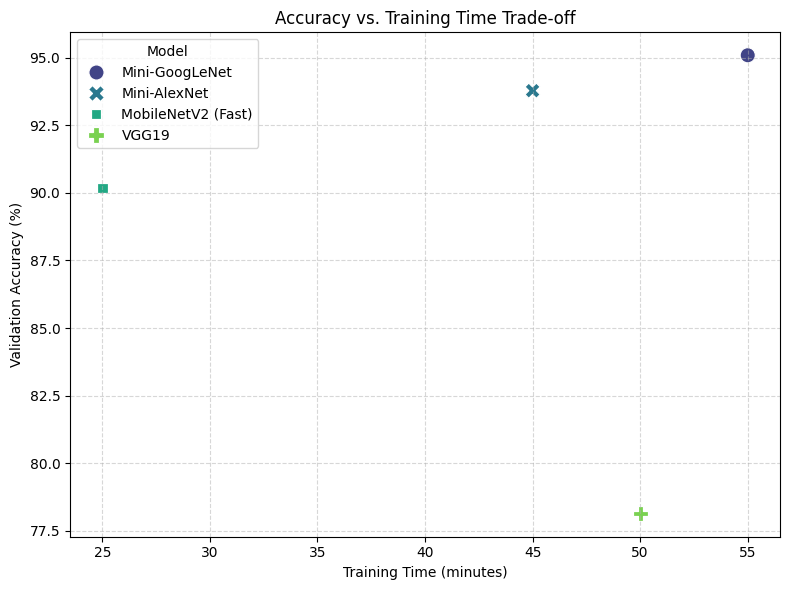

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="Training Time (minutes)",
    y="Validation Accuracy (%)",
    data=df,
    s=120,
    hue="Model",
    style="Model",
    palette="viridis"
)
plt.title("Accuracy vs. Training Time Trade-off")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:

df

,Model,Validation Accuracy (%),Training Time (minutes),Model Size (MB)
0,Mini-GoogLeNet,95.09,55,40
1,Mini-AlexNet,93.78,45,60
2,MobileNetV2 (Fast),90.18,25,14
3,VGG19,78.13,50,530


In [ ]:
# Normalize metrics to 0-1 scale
df_norm = df.copy()
df_norm["Acc_norm"] = df["Validation Accuracy (%)"] / df["Validation Accuracy (%)"].max()
df_norm["Speed_norm"] = 1 - (df["Training Time (minutes)"] / df["Training Time (minutes)"].max())
df_norm["Size_norm"] = 1 - (df["Model Size (MB)"] / df["Model Size (MB)"].max())

# Weighted score (adjust weights as desired)
df_norm["Overall Score"] = 0.6*df_norm["Acc_norm"] + 0.25*df_norm["Speed_norm"] + 0.15*df_norm["Size_norm"]
df_norm = df_norm.sort_values("Overall Score", ascending=False).reset_index(drop=True)

print("=== Weighted Model Ranking ===")
display(df_norm[["Model","Validation Accuracy (%)","Overall Score"]])
print(f"\n🏅 Overall Best Model: {df_norm.loc[0,'Model']}")


=== Weighted Model Ranking ===


,Model,Validation Accuracy (%),Overall Score
0,MobileNetV2 (Fast),90.18,0.851420
1,Mini-AlexNet,93.78,0.770208
2,Mini-GoogLeNet,95.09,0.738679
3,VGG19,78.13,0.515713



🏅 Overall Best Model: MobileNetV2 (Fast)
